### Importing Necessary Packages

In [32]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tensorflow.keras import layers, models
from PIL import Image
import pl
from sklearn.preprocessing import LabelEncoder

### Importing Data

In [33]:
sample_submission = pd.read_csv('data/dogs/sample_submission.csv')
ids_labels_df = pd.read_csv('data/dogs/labels.csv')
ids_labels_df = ids_labels_df[:5000] #reducing the size of the dataset to 5000 images because of memory issues
ids_labels = ids_labels_df.values

### Data Formatting

In [34]:
labels_unsorted = ids_labels[:,1]

label_encoder = LabelEncoder()
labels_unsorted_encoded = label_encoder.fit_transform(labels_unsorted)
ids_labels[:,1] = labels_unsorted_encoded

features = np.empty((0, 28, 28), dtype=np.uint8)
labels = np.empty((0), dtype=np.uint8)


for id, label in ids_labels:
    image = Image.open('data/dogs/train/'+id+'.jpg')
    image = image.resize((28, 28))
    image = np.array(image)
    #convert to grayscale
    image = image.mean(axis=2, keepdims=False)
    image = np.expand_dims(image, axis=0)
    features = np.concatenate((features, image), axis=0)
    
    label = np.expand_dims(label, axis=0)
    labels = np.concatenate((labels, label), axis=0)

### Initial Analysis

In [35]:
print(f"The dataset has {len(labels)} images.")
print(f"There are {len(np.unique(labels))} unique dog breeds present in the dataset.")

The dataset has 5000 images.
There are 120 unique dog breeds present in the dataset.


In [36]:
print(f"This is what the image IDs and the labels look like:\n{ids_labels_df.head()}")

This is what the image IDs and the labels look like:
                                 id breed
0  000bec180eb18c7604dcecc8fe0dba07    19
1  001513dfcb2ffafc82cccf4d8bbaba97    37
2  001cdf01b096e06d78e9e5112d419397    85
3  00214f311d5d2247d5dfe4fe24b2303d    15
4  0021f9ceb3235effd7fcde7f7538ed62    49


This is an example of an image:
AxesImage(size=(375, 500))


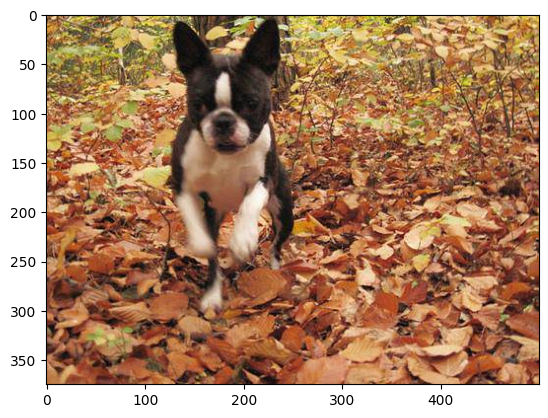

In [37]:
print(f"This is an example of an image:\n{plt.imshow(plt.imread('data/dogs/train/000bec180eb18c7604dcecc8fe0dba07.jpg'))}")

In [38]:
print(f"The Maltese dog is the most common breed occuring, while the Otterhound is the least common breed: \n{ids_labels_df['breed'].value_counts()}")

The Maltese dog is the most common breed occuring, while the Otterhound is the least common breed: 
73     63
68     60
97     57
10     57
93     55
       ..
22     30
112    30
91     30
43     29
83     27
Name: breed, Length: 120, dtype: int64


This is the distribution of the breeds:
Axes(0.125,0.11;0.775x0.77)


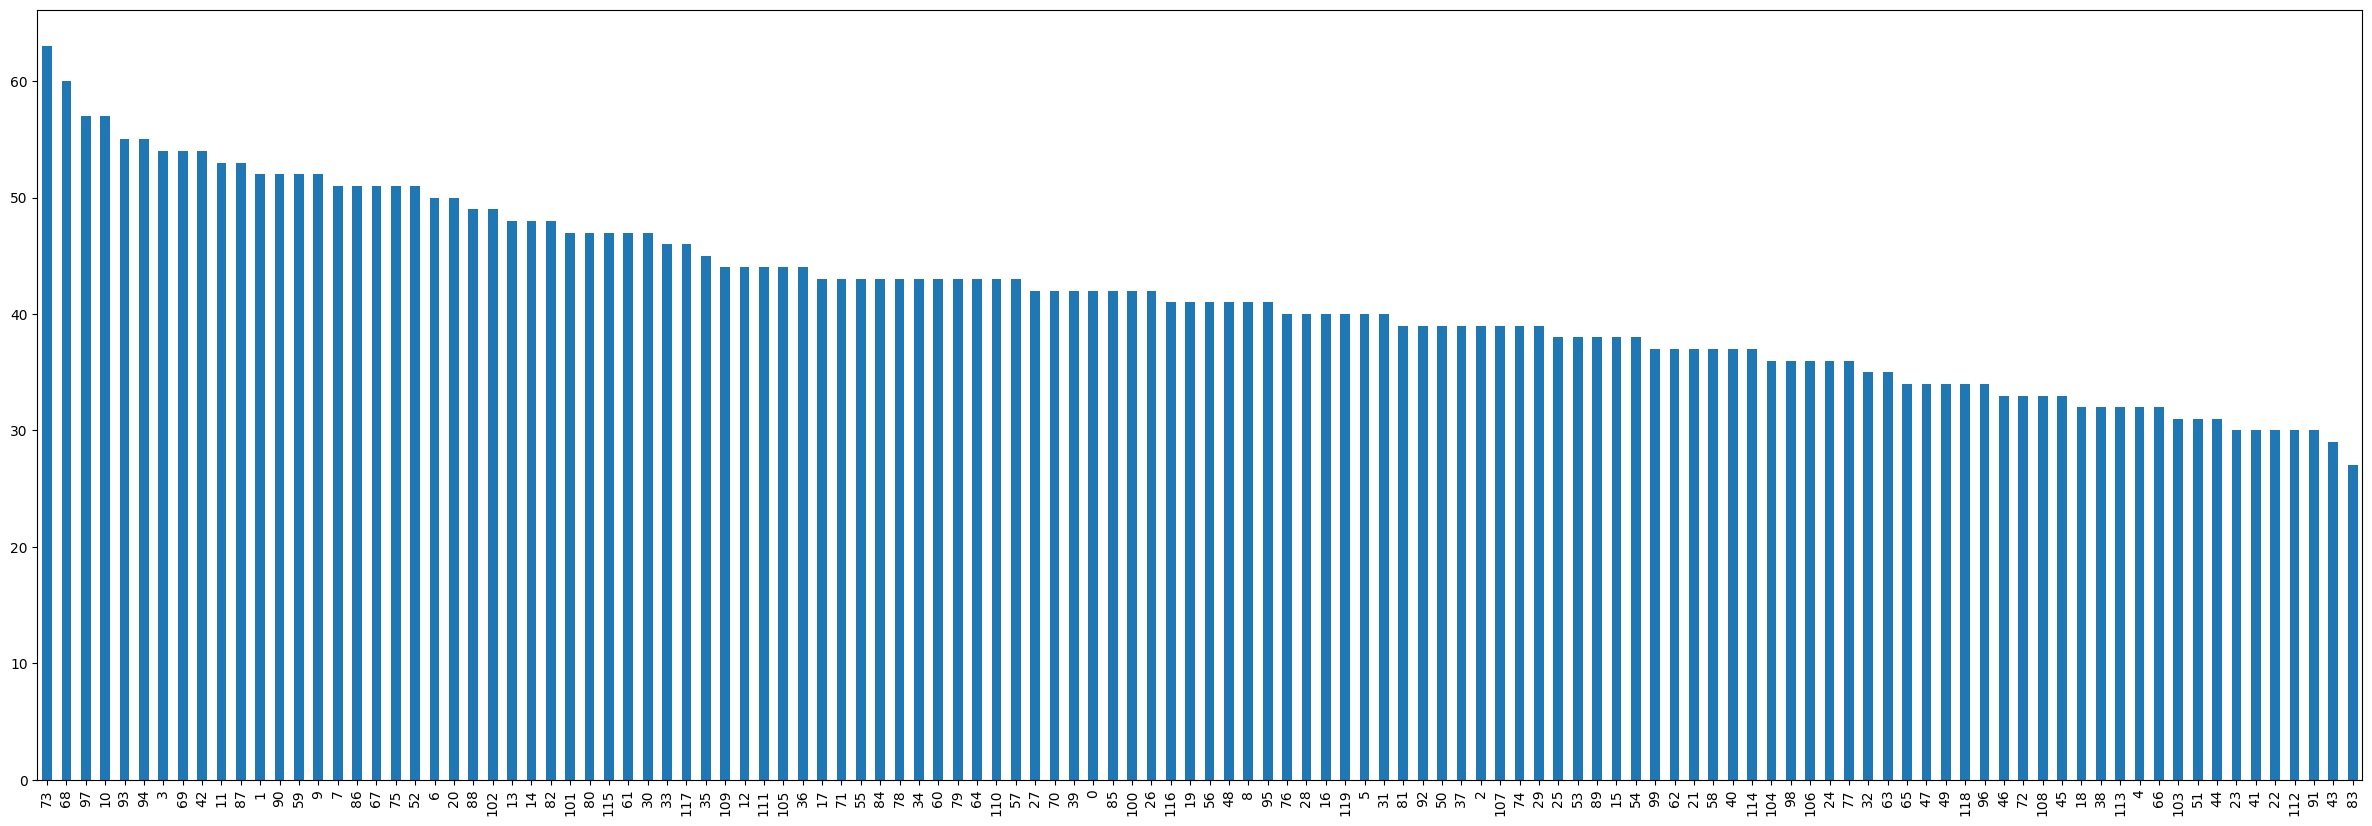

In [39]:
print(f"This is the distribution of the breeds:\n{ids_labels_df['breed'].value_counts().plot(kind='bar', figsize=(30, 10))}")

A sample of the downsampled and resized images that are used for the training: 


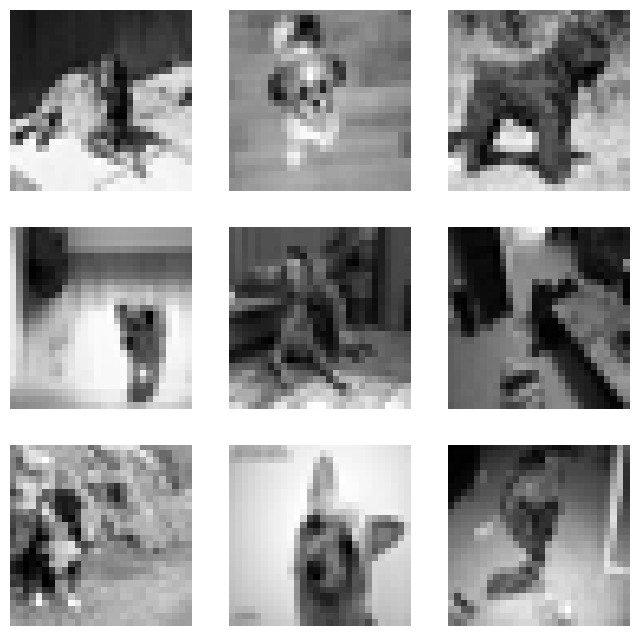

In [40]:
print("A sample of the downsampled and resized images that are used for the training: ")
random_indices = np.random.choice(features.shape[0], size=9, replace=False)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Iterate over the random indices and display images
for i, ax in enumerate(axes.flat):
    random_index = random_indices[i]
    image = features[random_index]

    ax.imshow(image, cmap='gray')  # Assuming images are grayscale
    ax.axis('off')

plt.show()

### Pipeline Execution

-------------------
Baseline model:
Accuracy on validation set: 0.0120
Accuracy on test set: 0.0140
-------------------
Linear model:
Accuracy on validation set: 0.0200
Accuracy on test set: 0.0260
-------------------
CNN model:
Epoch 1/5
94/94 [==============================] - 3s 20ms/step - loss: 4.7851 - accuracy: 0.0120 - val_loss: 4.7493 - val_accuracy: 0.0280
Epoch 2/5
94/94 [==============================] - 2s 19ms/step - loss: 4.6938 - accuracy: 0.0213 - val_loss: 4.6459 - val_accuracy: 0.0280
Epoch 3/5
94/94 [==============================] - 2s 18ms/step - loss: 4.5667 - accuracy: 0.0263 - val_loss: 4.6043 - val_accuracy: 0.0260
Epoch 4/5
94/94 [==============================] - 2s 19ms/step - loss: 4.4640 - accuracy: 0.0400 - val_loss: 4.5889 - val_accuracy: 0.0260
Epoch 5/5
94/94 [==============================] - 2s 19ms/step - loss: 4.3581 - accuracy: 0.0490 - val_loss: 4.6282 - val_accuracy: 0.0360


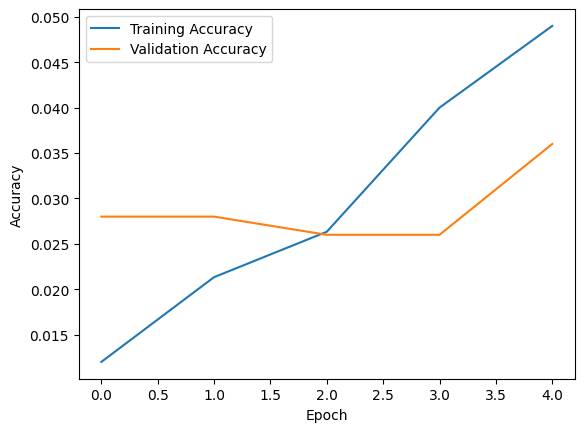

16/16 [==============================] - 0s 11ms/step - loss: 4.7395 - accuracy: 0.0180
Test Loss: 4.7395
Test Accuracy: 0.0180
-------------------


In [41]:
pl.pipeline(features, labels, 120)